# Niż demograficzny a spadek liczby miejsc w domach studenckich

In [ ]:
disp

In [18]:
library("tidyverse")
library("jpeg")

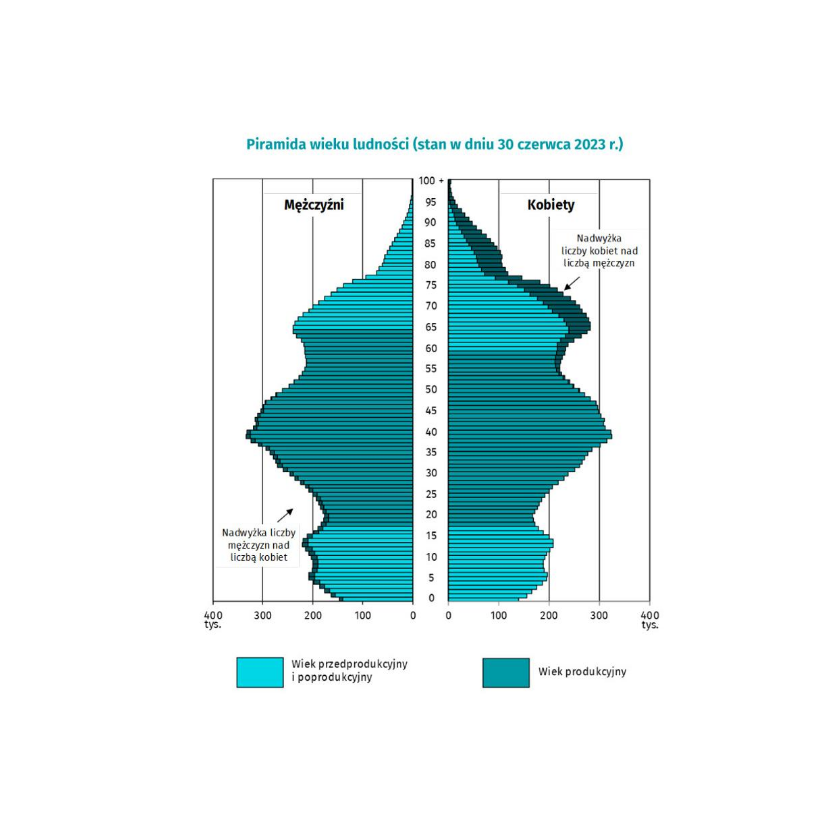

In [20]:
jj <- readJPEG("Wykres_demografia.jpg", native = TRUE)
plot(0:1, 0:1, type="n", ann = FALSE, axes = FALSE)
rasterImage(jj, 0, 0, 1, 1)

In [6]:
graduates <- read.csv2("dane3_kopia_zapasowa/Absolwenci uczelni.csv")
student_houses <- read.csv2("dane3_kopia_zapasowa/Domy studenckie.csv")
students_in_houses <- read.csv2("dane3_kopia_zapasowa/Korzystający z domów studenckich.csv")
spots_in_student_houses <- read.csv2("dane3_kopia_zapasowa/Miejsca w domach studenckich.csv")
students <- read.csv2("dane3_kopia_zapasowa/Studenci uczelni.csv")

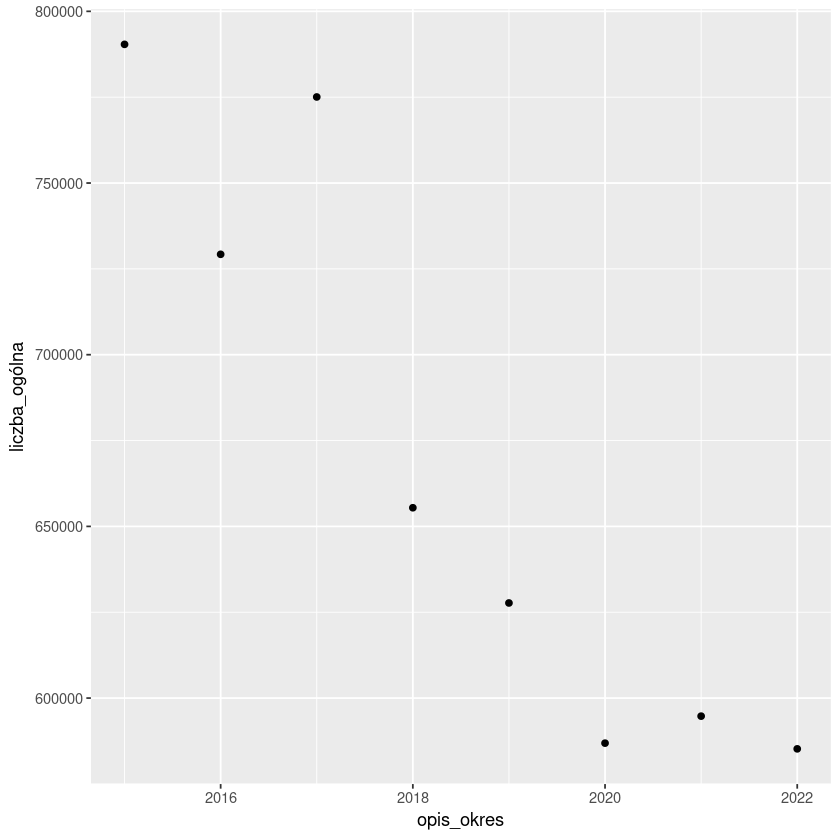

In [36]:
graduates |>
  filter(opis_okres > 2014) |>
  select(opis_okres, wartosc) |>
  group_by(opis_okres)  |>
  summarise(liczba_ogólna = sum(wartosc, na.rm = TRUE)) |>
  ggplot(aes(x = opis_okres, y = liczba_ogólna)) + geom_point()

In [9]:
students |> select(opis_okres, wartosc, typ_informacji)

opis_okres,wartosc,typ_informacji
<dbl>,<dbl>,<chr>
2010,1841.3,[tys. osób]
2011,1764.1,[tys. osób]
2012,1676.9,[tys. osób]
2013,1549.9,[tys. osób]
2014,1469.4,[tys. osób]
2015,1405.1,[tys. osób]
2016,1348.8,[tys. osób]
2017,1291.9,[tys. osób]
2018,1230.3,[tys. osób]
